In [53]:
import re
import numpy  

def lectureSpicePrint(filename, debug=False):
    f = open(filename,"r")
    lignes = f.readlines()
    k = 0
    while not re.match("-+",lignes[k]):
        print(lignes[k])
        k += 1
    k += 1
    entete =lignes[k].strip()
    champs = re.split("\s+",entete)
    print(champs)
    k += 2
    ligne = lignes[k].strip()
    valeurs = re.split("\s+",ligne)
    complexes = []
    data = {}
    j = 0
    for i in range(len(champs)):
        valeurs[i] = valeurs[i].strip()
        if valeurs[j][len(valeurs[j])-1] == ",":
            complexes.append(True)
            j += 2
            data[champs[i]] = numpy.zeros(0,numpy.complex128)
        else:
            complexes.append(False)
            j += 1
            data[champs[i]] = numpy.zeros(0,numpy.float64)
    index = 0
    while k < len(lignes):
        ligne = lignes[k].strip()
        if re.match("^[\d+]",ligne):
            valeurs = re.split("\s+",ligne)
            j = 0
            for i in range(len(champs)):
                if complexes[i]:
                    valeurs[j]= valeurs[j][:len(valeurs[2])-1]
                    valeurs[j]= valeurs[j].replace(",",".")
                    valeurs[j+1]= valeurs[j+1].replace(",",".")
                    data[champs[i]] = numpy.append(data[champs[i]],complex(float(valeurs[j]),float(valeurs[j+1])))
                    j += 2
                else:
                    valeurs[j]= valeurs[j].replace(",",".")
                    data[champs[i]] = numpy.append(data[champs[i]],float(valeurs[j]))
                    j += 1
        k += 1
    f.close()
    return data
            


Note: Compatibility modes selected: hs a


Circuit: rc circuit

Doing analysis at TEMP = 27.000000 and TNOM = 27.000000


No. of Data Rows : 41
Here are the vectors currently active:

Title: rc circuit
Name: ac1 (AC Analysis)
Date: Sun Oct 30 23:23:39  2022

    V(1)                : voltage, complex, 41 long
    V(2)                : voltage, complex, 41 long
    frequency           : frequency, complex, 41 long, grid = xlog [default scale]
    v1#branch           : current, complex, 41 long
                                   rc circuit

                                   AC Analysis  Sun Oct 30 23:23:39  2022

['Index', 'frequency', 'vdb(2)', 'vp(2)']


Note: No ".plot", ".print", or ".fourier" lines; no simulations run


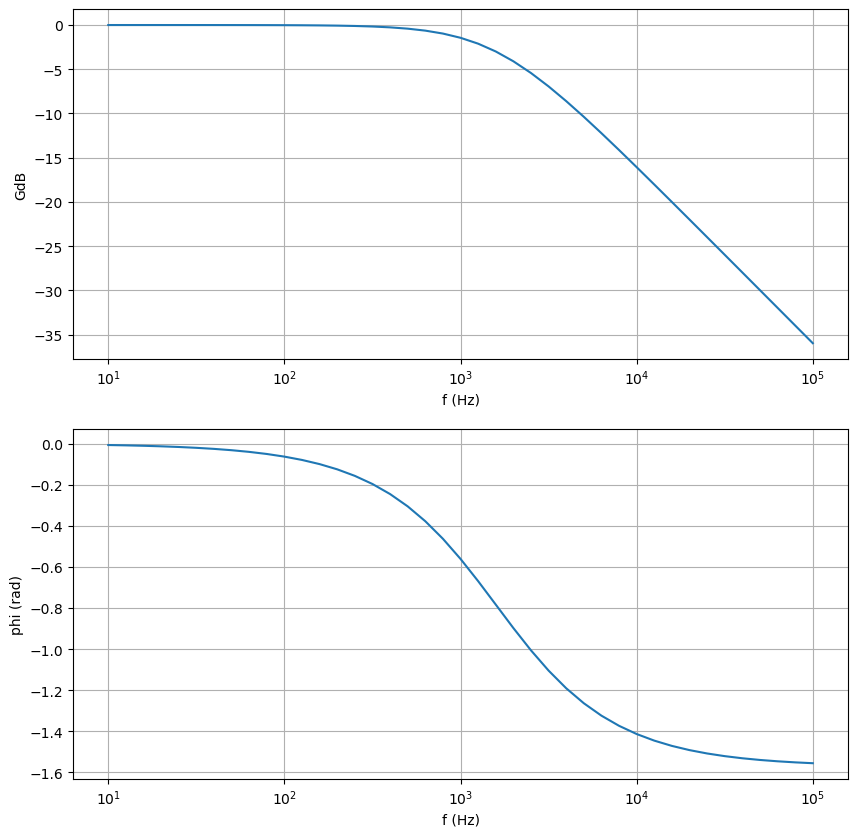

In [54]:
import os
import sys
from matplotlib import pyplot as plt

fn = 'circuitRC-1.cir'
fp = open(fn,'w+')
a = '''RC circuit
v1 1 0 dc 0 ac 1
r1 1 2 1k 
c1 2 0 100n
r2 2 0 1MEG
.control
ac dec 10 10Hz 100kHz
display
print vdb(2) vp(2)> export-1.txt
.endc
.end
'''
fp.write(a)
fp.close()
os.system('ngspice -b circuitRC-1.cir')


data = lectureSpicePrint("export-1.txt")
f    = data["frequency"]
vdb2 = data["vdb(2)"]
vp2  = data["vp(2)"]
plt.figure(figsize=(10,10))
plt.subplot(211)
plt.plot(f,vdb2)
plt.xscale('symlog')
plt.xlabel('f (Hz)')
plt.ylabel('GdB')
plt.grid()
plt.subplot(212)
plt.plot(f,vp2)
plt.xscale('symlog')
plt.xlabel('f (Hz)')
plt.ylabel('phi (rad)')
plt.grid()

  ** sch_path: /home/andylithia/openmpw/project-reisen-chip1/xschem/ctle_3.sch

  AC Analysis  Sun Oct 30 23:25:22  2022

['Index', 'frequency', 'vop']
  ** sch_path: /home/andylithia/openmpw/project-reisen-chip1/xschem/ctle_3.sch

  AC Analysis  Sun Oct 30 23:25:22  2022

['Index', 'frequency', 'vop']
  ** sch_path: /home/andylithia/openmpw/project-reisen-chip1/xschem/ctle_3.sch

  AC Analysis  Sun Oct 30 23:25:22  2022

['Index', 'frequency', 'vop']
  ** sch_path: /home/andylithia/openmpw/project-reisen-chip1/xschem/ctle_3.sch

  AC Analysis  Sun Oct 30 23:25:22  2022

['Index', 'frequency', 'vop']
  ** sch_path: /home/andylithia/openmpw/project-reisen-chip1/xschem/ctle_3.sch

  AC Analysis  Sun Oct 30 23:25:22  2022

['Index', 'frequency', 'vop']
  ** sch_path: /home/andylithia/openmpw/project-reisen-chip1/xschem/ctle_3.sch

  AC Analysis  Sun Oct 30 23:25:22  2022

['Index', 'frequency', 'vop']
  ** sch_path: /home/andylithia/openmpw/project-reisen-chip1/xschem/ctle_3.sch

  AC Ana

Text(0.5, 0, 'Frequency / Hz')

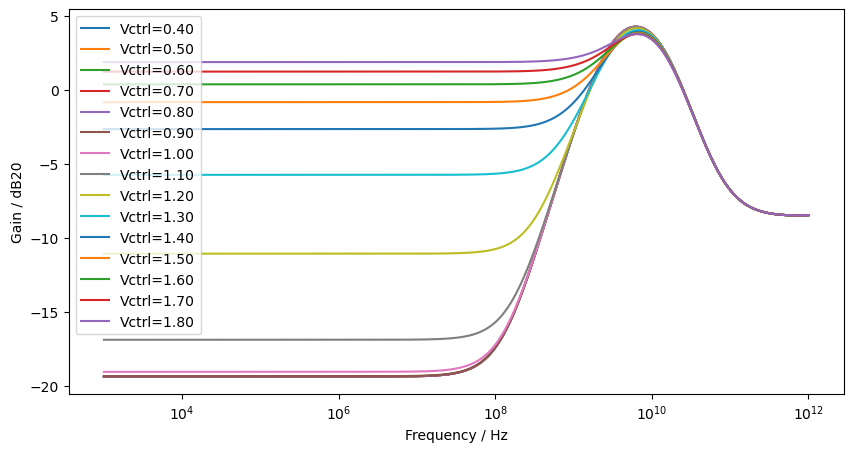

In [62]:
data_list = []
legend_list = []
plt.figure(figsize=(10,5))
for i in range(40,180+10,10):
    fn   = './data_test_'+('%f' % (i/100)).rstrip('0').rstrip('.')+'.raw'
    data = lectureSpicePrint(fn)
    data_list.append(data['vop'])
    legend_list.append(f'Vctrl={(i/100):0.2f}')
# data = lectureSpicePrint("export-1.txt")
# f    = data["frequency"]
# vdb2 = data["vdb(2)"]
# vp2  = data["vp(2)"])
freq = data['frequency']

for d in data_list:
    plt.semilogx(freq,20*numpy.log10(numpy.abs(d)))
plt.legend(legend_list)
plt.ylabel('Gain / dB20')
plt.xlabel('Frequency / Hz')
    